In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data
df = pd.read_csv('../data/raw/data.csv')  # Adjust path as needed

### 1. Overview of the Data
#### Understand structure: rows, columns, types.

In [5]:
# Number of rows and columns
print(df.shape)

# Data types and non-null counts
print(df.info())

# Sample data
print(df.head())

(95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudRe

### 2. Summary Statistics
#### Central tendency, dispersion, shape.

In [6]:
# Numerical summary
print(df.describe())

# Categorical summary
print(df.describe(include='object'))

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000
              TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633   
top     TransactionId_76871  BatchId_67019  AccountId_4841   
freq                      1             28        

### 3. Distribution of Numerical Features
#### Visualize to spot patterns, skewness, outliers.

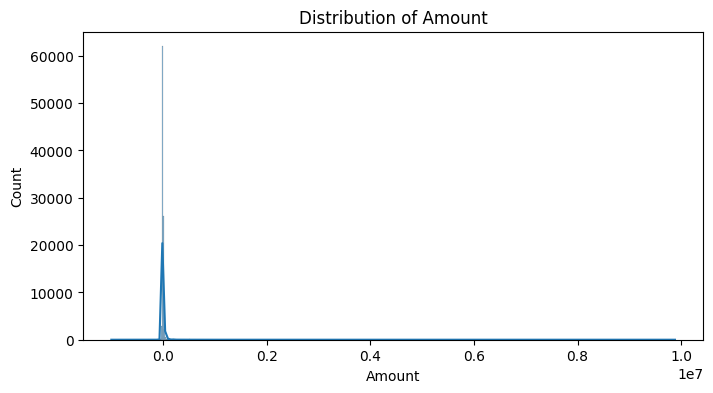

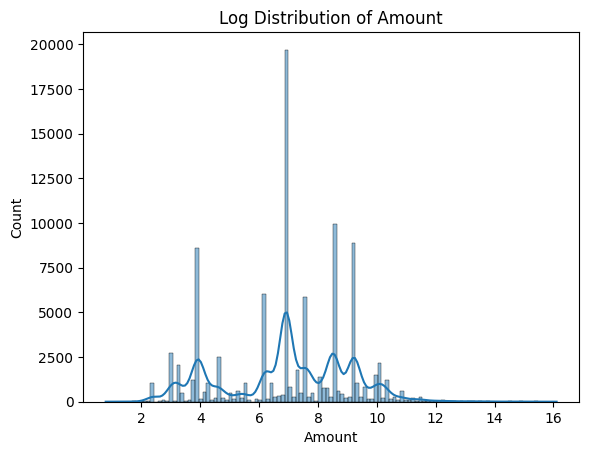

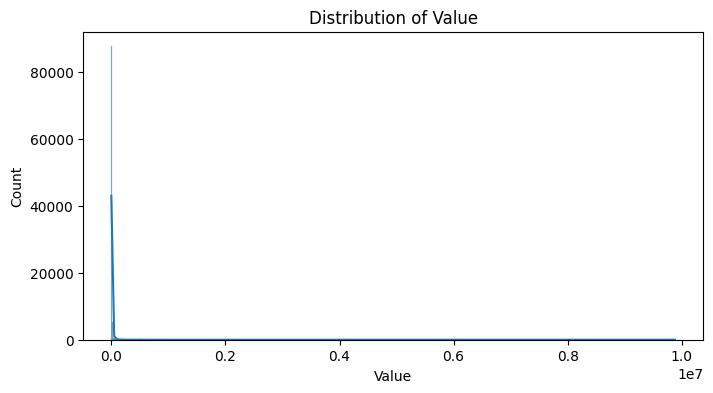

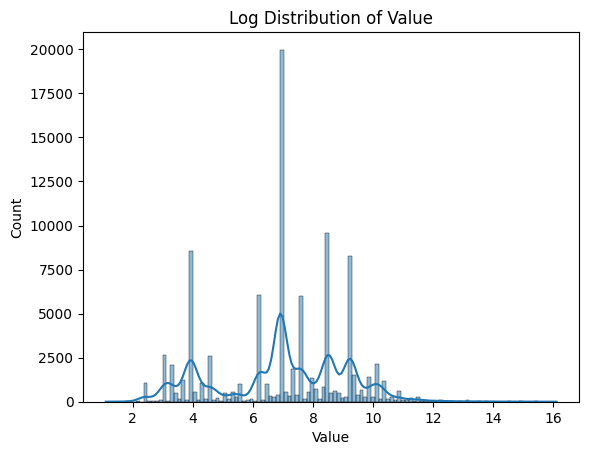

In [7]:
numerical_cols = ['Amount', 'Value']  # Add others like CountryCode if relevant

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    # Log transform for skewness if needed
    if df[col].skew() > 1:
        sns.histplot(np.log1p(df[col].abs()), kde=True)  # Handle negatives
        plt.title(f'Log Distribution of {col}')
        plt.show()

### 4. Distribution of Categorical Features
#### Frequency and variability.

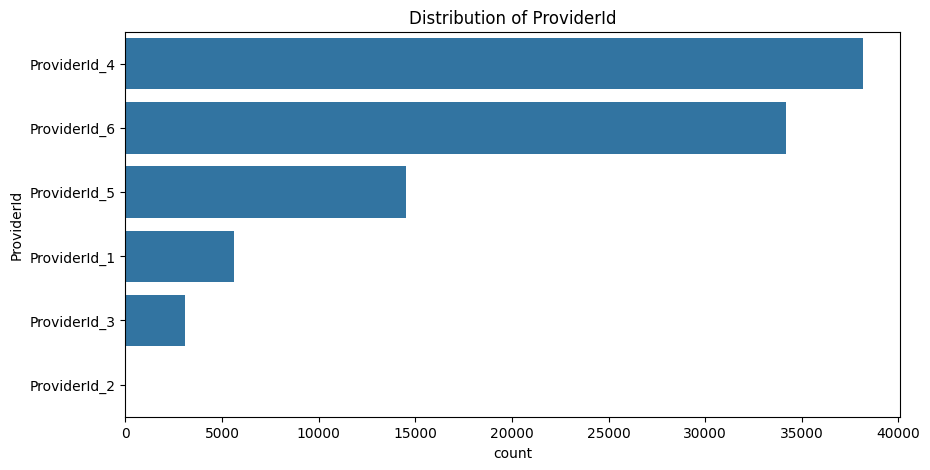

ProviderId
ProviderId_4    0.399208
ProviderId_6    0.357362
ProviderId_5    0.152014
ProviderId_1    0.058989
ProviderId_3    0.032239
ProviderId_2    0.000188
Name: proportion, dtype: float64


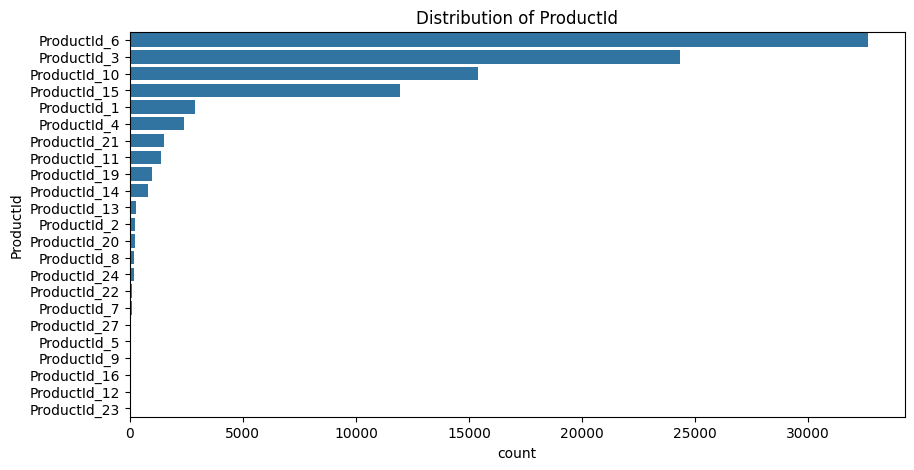

ProductId
ProductId_6     0.341149
ProductId_3     0.254479
ProductId_10    0.160816
ProductId_15    0.125065
ProductId_1     0.030158
ProductId_4     0.025120
ProductId_21    0.015806
ProductId_11    0.014394
ProductId_19    0.010088
ProductId_14    0.008248
ProductId_13    0.003094
ProductId_2     0.002467
ProductId_20    0.002258
ProductId_8     0.002059
ProductId_24    0.001829
ProductId_22    0.001171
ProductId_7     0.000899
ProductId_27    0.000324
ProductId_5     0.000261
ProductId_9     0.000178
ProductId_16    0.000105
ProductId_12    0.000021
ProductId_23    0.000010
Name: proportion, dtype: float64


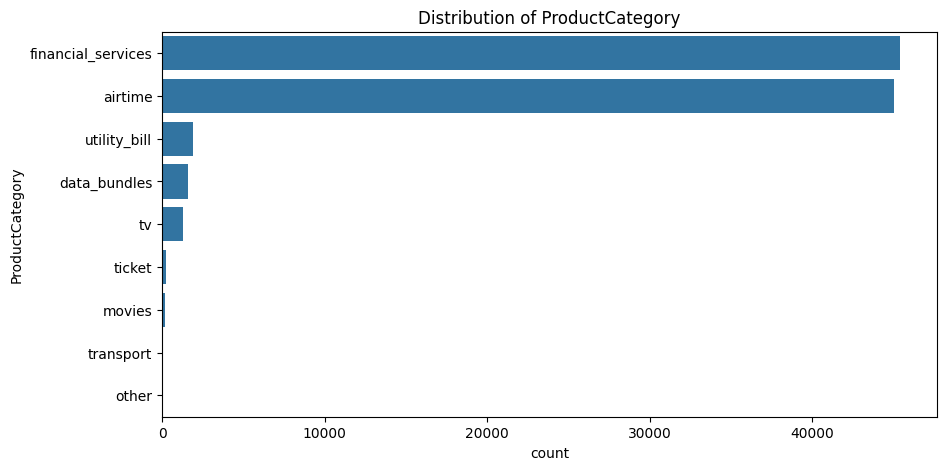

ProductCategory
financial_services    0.474640
airtime               0.470688
utility_bill          0.020071
data_bundles          0.016861
tv                    0.013370
ticket                0.002258
movies                0.001829
transport             0.000261
other                 0.000021
Name: proportion, dtype: float64


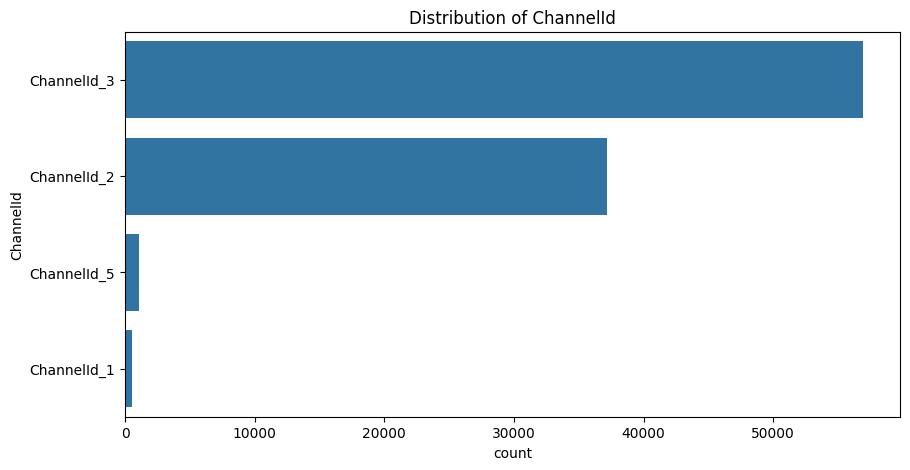

ChannelId
ChannelId_3    0.595168
ChannelId_2    0.388252
ChannelId_5    0.010955
ChannelId_1    0.005624
Name: proportion, dtype: float64


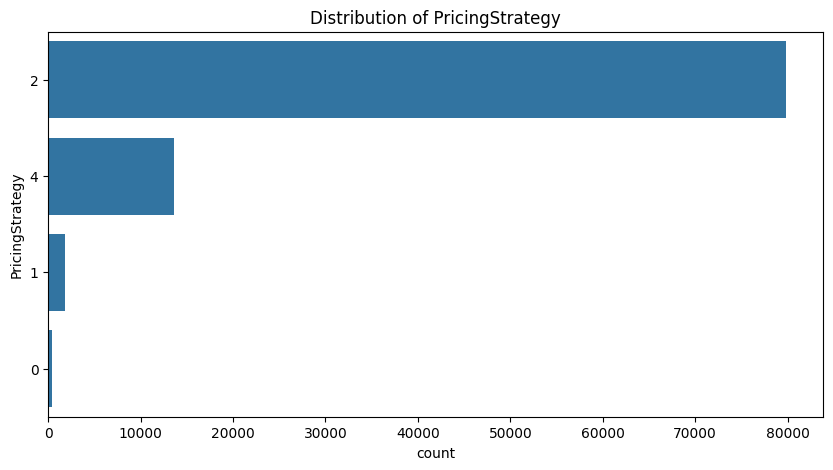

PricingStrategy
2    0.834689
4    0.141770
1    0.019517
0    0.004025
Name: proportion, dtype: float64


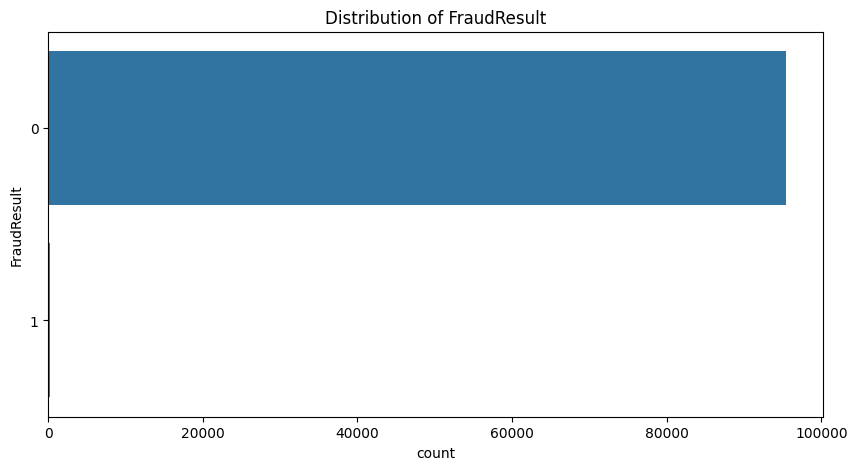

FraudResult
0    0.997982
1    0.002018
Name: proportion, dtype: float64


In [8]:
categorical_cols = ['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    print(df[col].value_counts(normalize=True))  # Proportions

### 5. Correlation Analysis
#### Relationships between numerical features.

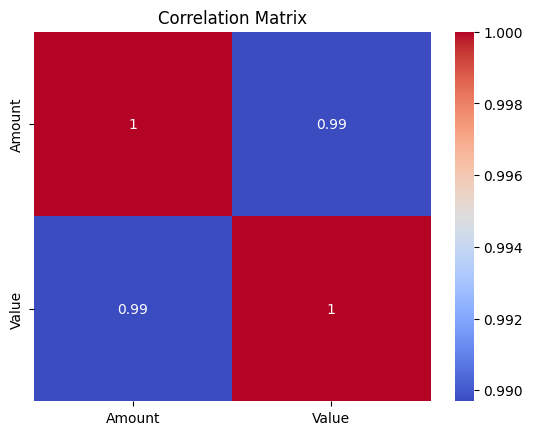

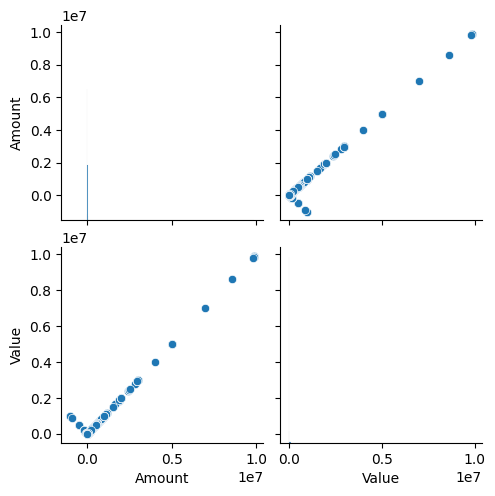

In [9]:
# Correlation matrix
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for deeper view
sns.pairplot(df[numerical_cols])
plt.show()

### 6. Identifying Missing Values
#### Strategies for handling.

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


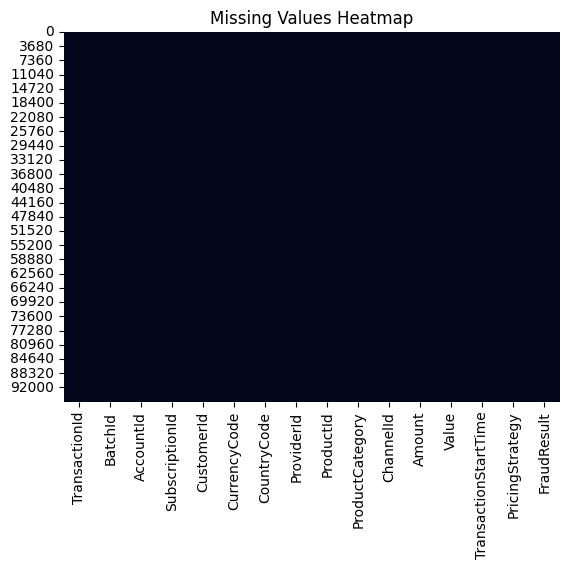

In [10]:
# Missing values count
print(df.isnull().sum())

# Heatmap for visualization
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### 7. Outlier Detection
#### Use box plots.

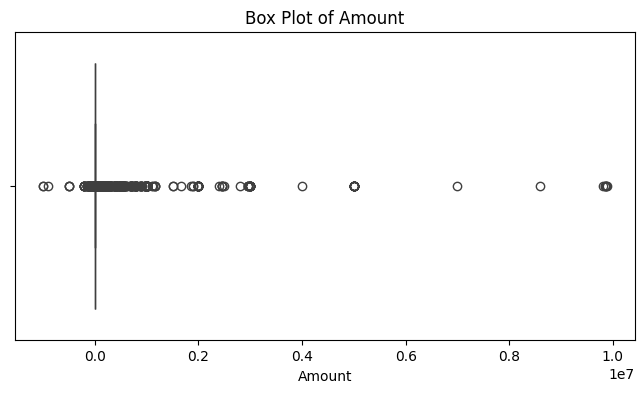

Outliers in Amount: 24441


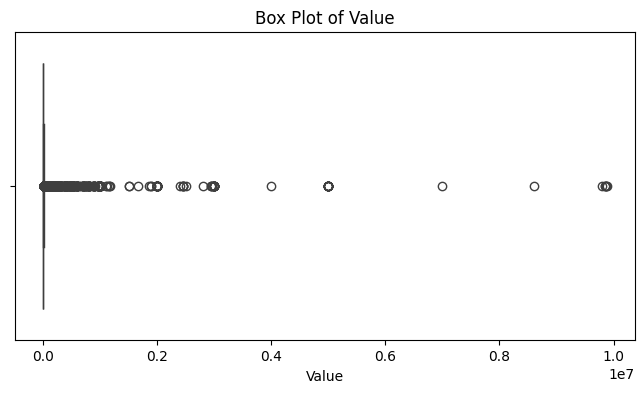

Outliers in Value: 9021


In [11]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()
    
    # IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f'Outliers in {col}: {len(outliers)}')